In [2]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

# Import

In [3]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

WORK_DIR = Path(Path.cwd()).parent
sys.path.append(str(WORK_DIR))
from src import ROOT, parse
from src.models import get_model
from src.datasets.transforms import *
from src.datasets import get_dataset, get_dataloader
from src.utils import *

cfg_dir = 'mlcv-exp/data/cfg/'

# Setup

In [4]:
dataset = 'ho3d'
model_name = 'hpo_hand'
exp = 'exp_resnet50'
epoch = 200
cfg_name = '{}_{}_{}.cfg'.format(dataset, model_name, exp)
cfg = parse(str(Path(ROOT)/cfg_dir/model_name/cfg_name))
cfg['aug'] = None
cfg['batch_size'] = 1
cfg['shuffle'] = None
cfg['mode'] = 'test'
cfg['load_epoch'] = epoch
model = get_model(cfg)
model.net.eval()
clear_output()

# Loading

In [5]:
dataset = 'Task3'
img_format = 'png'
frame_id = 0
img_file = 'test_images'
img_frame = 'image_C{:08d}.{}'.format(frame_id, img_format) #6635 max
img_path = Path('datasets')/dataset/img_file
frame_path = img_path/img_frame
print(img_path)

datasets/Task3/test_images


In [6]:
img = get_img_dataloader(str(Path(ROOT)/frame_path), int(cfg['img_rsz']))
img = img.unsqueeze(0).cuda()

# Show Img

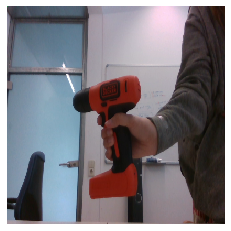

In [7]:
img_show = ImgToNumpy()(img.cpu())[0]
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img_show)
plt.show()

# Detect

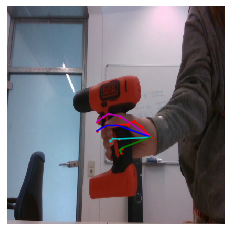

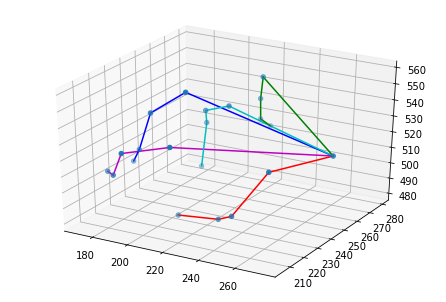

In [8]:
model.detect(img)

# Detect Video

In [9]:
# seq_range = (0, 1617) # testing drill 
# seq_range = (1617, 2506) # testing sugar box
# seq_range = (2506, 4289) # testing mug
# seq_range = (4289, 5179) # testing squeezething
# seq_range = (5179, 6236) # testing cheez box
# seq_range = (6236, 6636) # testing ending seq
seq_range = None
fps = 60

In [10]:
model.detect_video(Path(ROOT)/'datasets'/dataset/img_file, img_file, fps=fps, model_info='{}_{}_{}_{}_fps{}'.format(dataset, model_name, exp, epoch, fps), seq_range=seq_range)

  0%|          | 2/6636 [00:00<05:46, 19.15it/s]

/mnt/4TB/aaron/datasets/Task3/test_images


t:   0%|          | 3/6636 [00:00<04:20, 25.47it/s, now=None]

MoviePy - Building file /mnt/4TB/aaron/mlcv-exp/data/saved/test_images/detect_test_images_Task3_hpo_hand_exp_resnet50_200_fps60.gif with imageio.
